# Phishing URL Detection


From Wikipedia, https://en.wikipedia.org/wiki/Phishing

> Phishing is the fraudulent attempt to obtain sensitive information such as usernames, passwords and credit card details, often for malicious reasons, by disguising as a trustworthy entity in an electronic communication. The word is a neologism created as a homophone of fishing due to the similarity of using a bait in an attempt to catch a victim. The annual worldwide impact of phishing could be as high as US$5 billion.
>
> Phishing is typically carried out by email spoofing or instant messaging, and it often directs users to enter personal information at a fake website, the look and feel of which are identical to the legitimate site, the only difference being the URL of the website in concern. Communications purporting to be from social web sites, auction sites, banks, online payment processors or IT administrators are often used to lure victims. Phishing emails may contain links to websites that distribute malware.
>
> Phishing is an example of social engineering techniques used to deceive users, and it exploits weaknesses in current web security. Attempts to deal with the growing number of reported phishing incidents include legislation, user training, public awareness, and technical security measures.

Here's an example of a real phishing email sent in 2011 by attackers looking to get login credentials for Facebook users:

<pre>
LAST WARNING : Your account is reported to have violated the policies that are considered annoying or insulting Facebook users.

Until we system will disable your account within 24 hours if you do not do the reconfirmation.

Please confirm your account below:

[ Link Removed ]

Thanks.
The Facebook Team
Copyright facebook © 2011 Inc. All rights reserved.
</pre>

A victim clicking on the Phishing link would be taken to a site that looked like a pretty good copy of the Facebook login screen.

<img src="images/Not_Facebook.png">

Here are some examples of the links used in emails sent by the attackers running this phishing campaign:

**Note**: These links may be dangerous to your computer. Our practice will be to "neuter" links by wrapping certain characters with square brackets so that you cannot click on these links, or accidentally copy/paste them into your browser.

**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**
<pre>
http[:]//team-welcome[.]at[.]ua/facebook-support[.]html
http[:]//reportedpages[.]at[.]ua/facebook-support-account[.]html
http[:]//www[.]facebooks[.]cloud/PayPlls[.]CEanada[.]tNZnZZlR3ZdyZZ-5RkZZDRTZZBy
http[:]//www[.]greenaura[.]net/appz[.]westpac/westpac[.]appz/login[.]php
http[:]//www[.]irastrum[.]com/wp-admin/mail[.]yahoo[.]com/
http[:]//appleid[.]apple[.]com-subscriptions[.]manager508158125[.]kevinfoley[.]com
</pre>
**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**


Something smells a little phishy about these links. Given a close look by a human, you'd probably be able to decide pretty quickly if the link was really sent by Facebook or not. But billions of people get hundreds or thousands of emails each every day! How can defenders keep up with the onslaught by the phishers?

## The Problem

We want to use methods from Machine Learning to build a computer program that will automatically flag links it thinks are phishing attempts. We can do this by studying the problem, looking at data, and learning a decision rule.

The dataset we will be using is named "FIU_Phishing_Mitre_Dataset.csv" and a testing dataset (without labels) is named "Test_FIU_Phishing_Mitre_Dataset.csv".
#### Analyze the data, build features, or use the existing features in the data to build a model, and report your findings. We will use the F1 score to evaluate the final models from participants using a test set that we have set aside. 

##### Please email your final models to Ali Zaidi (szaidi@mitre.org) so that they can be run on the test set and evaluated in the competition. If you need help with the challenge, please find the Mitre table and the challenge organizers will be available to assist you. 

## Explore Some Data

Let's take a look at the provided features on our set of URLs. 

* Create Age (in Months): The age of the domain. If the value is -1, that information is not available or the domain has been deleted. 
* Expiry Age (in Months): The amount of months until the domain expires. If the value is negative, that information is not available or the domain has been deleted.
* Update Age (in Days): The last time the domain was updated. If the value is -1, that information is not available or the domain was deleted.
* URL: The URL of the website. Three periods have been added to the end of each URL to prevent the URL from being clicked for security purposes. 
* Label: A label to determine whether a website is a phishing link or not. 0 denotes a website that is not a phishing link, 1 denotes a website is a phishing link. 

In [1]:
# Import relevant libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
phish_data = pd.read_csv("FIU_Phishing_Mitre_Dataset.csv")

In [5]:
phish_data.head()

,col_1,create_age(months),expiry_age(months),update_age(days),URL,Label
0,642,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1
1,2968,212,16,663,http://www.coffeespecialties.com/...,0
2,2401,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,5337,198,6,186,http://atomicsoda.com/manutd...,0
4,6538,240,24,1684,http://bostoncoffeecake.com/...,0


In [6]:
phish_data.describe()

,col_1,create_age(months),expiry_age(months),update_age(days),Label
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000
mean,3473.695770,91.288810,12.264430,272.264638,0.532403
std,2024.044648,92.868921,20.033764,618.276458,0.499001
min,1.000000,-1.000000,-78.000000,-115.000000,0.000000
25%,1729.500000,-1.000000,-1.000000,-1.000000,0.000000
50%,3420.000000,56.000000,7.000000,91.000000,1.000000
75%,5241.000000,188.000000,12.000000,292.500000,1.000000
max,6999.000000,365.000000,120.000000,9959.000000,1.000000


In [7]:
phish_data["update_age(months)"] = phish_data["update_age(days)"].values/30
phish_data.head()

,col_1,create_age(months),expiry_age(months),update_age(days),URL,Label,update_age(months)
0,642,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1,-0.033333
1,2968,212,16,663,http://www.coffeespecialties.com/...,0,22.100000
2,2401,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1,-0.033333
3,5337,198,6,186,http://atomicsoda.com/manutd...,0,6.200000
4,6538,240,24,1684,http://bostoncoffeecake.com/...,0,56.133333


In [8]:
num_data = phish_data.iloc[:,[0,1,2,6]].values
num_lab = phish_data["Label"].values

In [9]:
col_1 = num_data[:,0]
create = num_data[:,1]
expiry = num_data[:,2]
update = num_data[:,3]


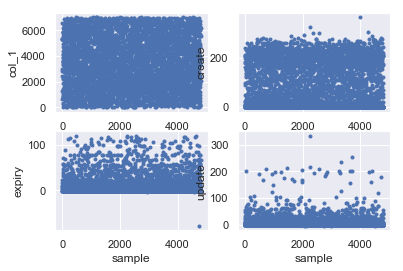

In [10]:
plt.subplot(2, 2, 1)
plt.plot(col_1, '.')

plt.xlabel('sample')
plt.ylabel('col_1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(create, '.')

plt.xlabel('sample')
plt.ylabel('create')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(expiry, '.')

plt.xlabel('sample')
plt.ylabel('expiry')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(update, '.')

plt.xlabel('sample')
plt.ylabel('update')
plt.grid(True)

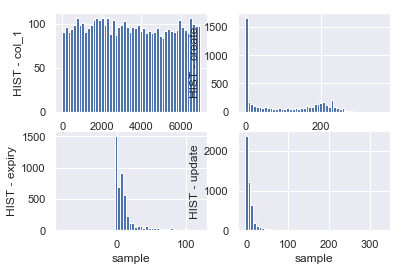

In [11]:
plt.subplot(2, 2, 1)
plt.hist(col_1, bins = 50)

plt.xlabel('sample')
plt.ylabel('HIST - col_1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(create, bins = 50)

plt.xlabel('sample')
plt.ylabel('HIST - create')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(expiry, bins = 50)

plt.xlabel('sample')
plt.ylabel('HIST - expiry')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(update, bins = 50)

plt.xlabel('sample')
plt.ylabel('HIST - update')
plt.grid(True)

In [12]:
num_data_scaled = StandardScaler().fit_transform(num_data)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(num_data_scaled, num_lab, test_size = 0.2, random_state = 42)

In [14]:
#load the model
clf = LogisticRegression()
#fit the model
clf.fit(X_train, y_train)

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
#evaluate the model by using a test set
y_hat = clf.predict(X_test)
#print the accuracy
print(np.average(y_hat == y_test))

print('Done')

0.8197916666666667
Done


In [16]:

print(f1_score(y_test, y_hat))

print('Done')

0.8344497607655503
Done


In [17]:
target_names = ["Not Phishing", "Phishing"]
print(classification_report(y_test, y_hat, target_names=target_names))

              precision    recall  f1-score   support

Not Phishing       0.88      0.74      0.80       474
    Phishing       0.78      0.90      0.83       486

   micro avg       0.82      0.82      0.82       960
   macro avg       0.83      0.82      0.82       960
weighted avg       0.83      0.82      0.82       960



In [18]:
confusion_matrix(y_test, y_hat)

array([[351, 123],
       [ 50, 436]], dtype=int64)

In [19]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=500),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


In [20]:
f1_vals = []

for name, clf in zip(names, classifiers):
    
    print(name)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_hat = clf.predict(X_test)
    
    f1_vals.append(f1_score(y_test, y_hat))
    
    print("Done")
    
print("Done")
    

Nearest Neighbors
Done
Linear SVM
Done
RBF SVM
Done
Gaussian Process
Done
Decision Tree
Done
Random Forest
Done
Neural Net
Done
AdaBoost
Done
Naive Bayes
Done
QDA
Done
Done


([<matplotlib.axis.XTick at 0x2a7ad853978>,
 <a list of 10 Text xticklabel objects>)

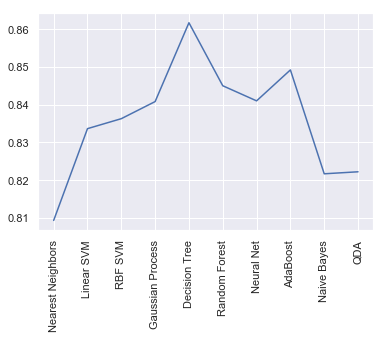

In [23]:
x = np.arange(0,len(f1_vals))

plt.plot(x, f1_vals)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, names, rotation='vertical')
